## Project # 1

For your first project, you are asked to:

* Identify and load a network dataset that has some categorical information available for each node.
* For each of the nodes in the dataset, calculate degree centrality and eigenvector centrality.
* Compare your centrality measures across your categorical groups.

For example:
        using the dataset from a study of romantic relationships among high school students in Columbus, Ohio
        [dataset](http://researchnews.osu.edu/archive/chains.htm)
        you might want to determine if there are any differences in your calculated centrality measures between the two sexes.
        You might use a t-test or another statistical measure to support your findings.


In [4]:
import yfinance as yf
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [5]:
tickers = pd.read_html('https://en.wikipedia.org/wiki/Dow_Jones_Industrial_Average')[1]

In [8]:
# extract symbol from df
# add them into a list
tickers = tickers.Symbol.to_list()

In [10]:
# create a list of dfs that will be populated with the Institutional Holder df
# the institutional holder info its extracted from the symbol ticker

frames = []

for ticker in tickers:
    var = yf.Ticker(ticker)
    frame = var.institutional_holders
    frame['comp'] = var.ticker
    frames.append(frame)

In [13]:
# create variable containing a list of all 30 companies of dow jones
all_dow = pd.concat(frames)

In [14]:
all_dow

,Holder,Shares,Date Reported,% Out,Value,comp
0,"Vanguard Group, Inc. (The)",50240763,2021-12-30,0.0880,8924266731,MMM
1,Blackrock Inc.,41810186,2021-12-30,0.0732,7426743339,MMM
2,State Street Corporation,30979936,2021-12-30,0.0542,5502966031,MMM
3,"Geode Capital Management, LLC",10780080,2021-12-30,0.0189,1914865610,MMM
4,"Charles Schwab Investment Management, Inc.",10557291,2021-12-30,0.0185,1875291600,MMM
...,...,...,...,...,...,...
5,Northern Trust Corporation,16607064,2021-12-30,0.0060,2402876090,WMT
6,Morgan Stanley,15580922,2021-12-30,0.0056,2254403604,WMT
7,State Farm Mutual Automobile Insurance Co,13083050,2021-12-30,0.0047,1892986504,WMT
8,Price (T.Rowe) Associates Inc,11843039,2021-12-30,0.0043,1713569312,WMT


## Draw Function 1

In [15]:
# create a graph using all_dow where source = holder and target = company
G = nx.from_pandas_edgelist(all_dow, 'Holder', 'comp')

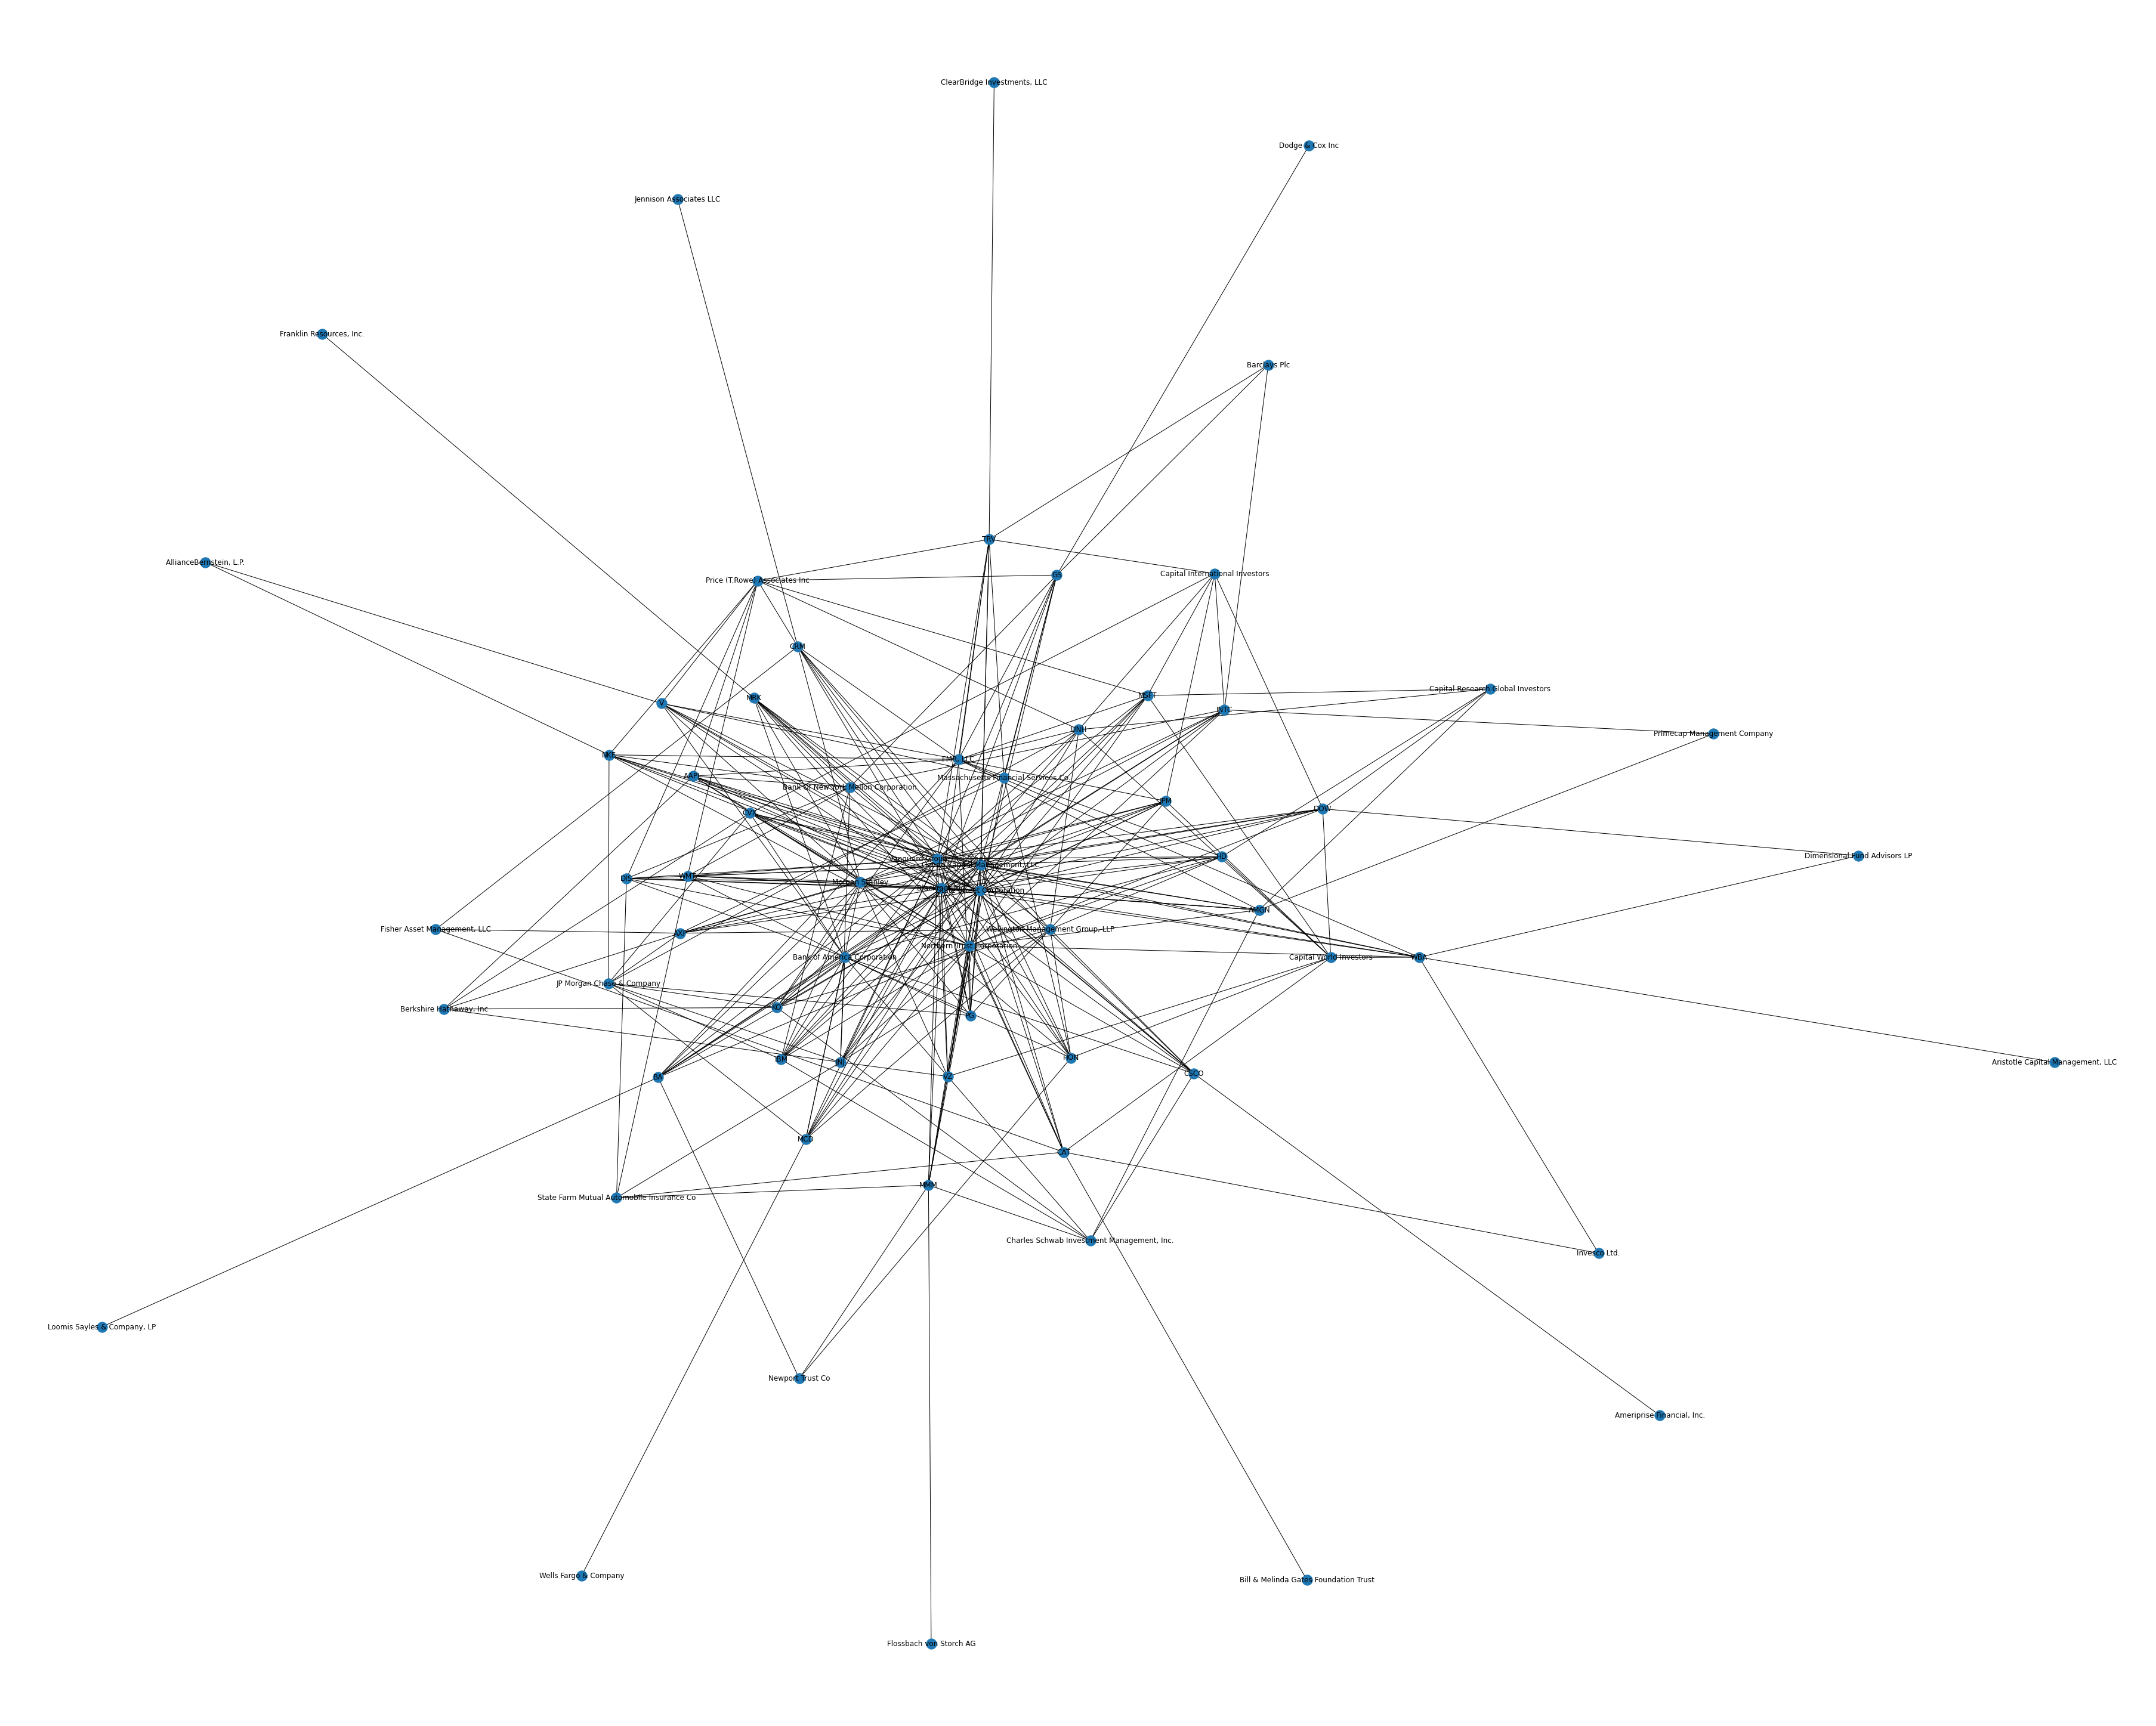

In [18]:
# hello dow jones network
plt.figure(figsize=(50,40))
nx.draw(G, with_labels=True)

## Draw Function 2
Node color
Node Size
Edge Width = edge_attr= True

In [28]:
G = nx.from_pandas_edgelist(all_dow, 'Holder', 'comp', edge_attr=True)

In [21]:
# Node Color
#to change color we iterate over ALL NODES
# we check if nodes in all_dow df is in the company column we transform into color blue
# anything else in orange

colors = []
for node in G:
    if node in all_dow['comp'].values:
        colors.append("blue")
    else:
        colors.append("orange")

In [23]:
# Node Size
# Node size depends on the degree of the node (how many relationships it has)
# visualize the degree of G (all_dow)
# ex. Vanguard has 30 relationships ( has relationships with all companies in Dow)
G.degree()

DegreeView({'Vanguard Group, Inc. (The)': 30, 'MMM': 10, 'Blackrock Inc.': 30, 'State Street Corporation': 30, 'Geode Capital Management, LLC': 29, 'Charles Schwab Investment Management, Inc.': 6, 'Newport Trust Co': 3, 'State Farm Mutual Automobile Insurance Co': 5, 'Flossbach von Storch AG': 1, 'Northern Trust Corporation': 21, 'Massachusetts Financial Services Co.': 6, 'Berkshire Hathaway, Inc': 5, 'AXP': 10, 'Wellington Management Group, LLP': 12, 'Fisher Asset Management, LLC': 3, 'JP Morgan Chase & Company': 9, 'Morgan Stanley': 19, 'AMGN': 10, 'Capital Research Global Investors': 5, 'Primecap Management Company': 2, 'FMR, LLC': 15, 'AAPL': 10, 'Price (T.Rowe) Associates Inc': 10, 'Bank Of New York Mellon Corporation': 10, 'BA': 10, 'Loomis Sayles & Company, LP': 1, 'Bank of America Corporation': 15, 'CAT': 10, 'Capital World Investors': 9, 'Bill & Melinda Gates Foundation Trust': 1, 'Invesco Ltd.': 2, 'CVX': 10, 'Capital International Investors': 7, 'CSCO': 10, 'Ameriprise Finan

In [36]:
# Node Size
# We need to extract the value of the degree from the dictionary
# we use list comprehension to extract value of each node
# in order to have better visuals we will multiply the degree * 100 so the nodes get enlarged
# [v * 100 for v in dict(G.degree()).values()]

In [35]:
# Edge width
edgelist = nx.to_edgelist(G)

In [37]:
# nx.to_edgelist provides another dictionary
# the values we are interested in are the "value" = which is the money invested in Dow companies
# use list comprehension to extract value
# since this values are large amounts of money (billions) we will divide by 50 Billion
# [v[2]['Value']for v in edgelist]

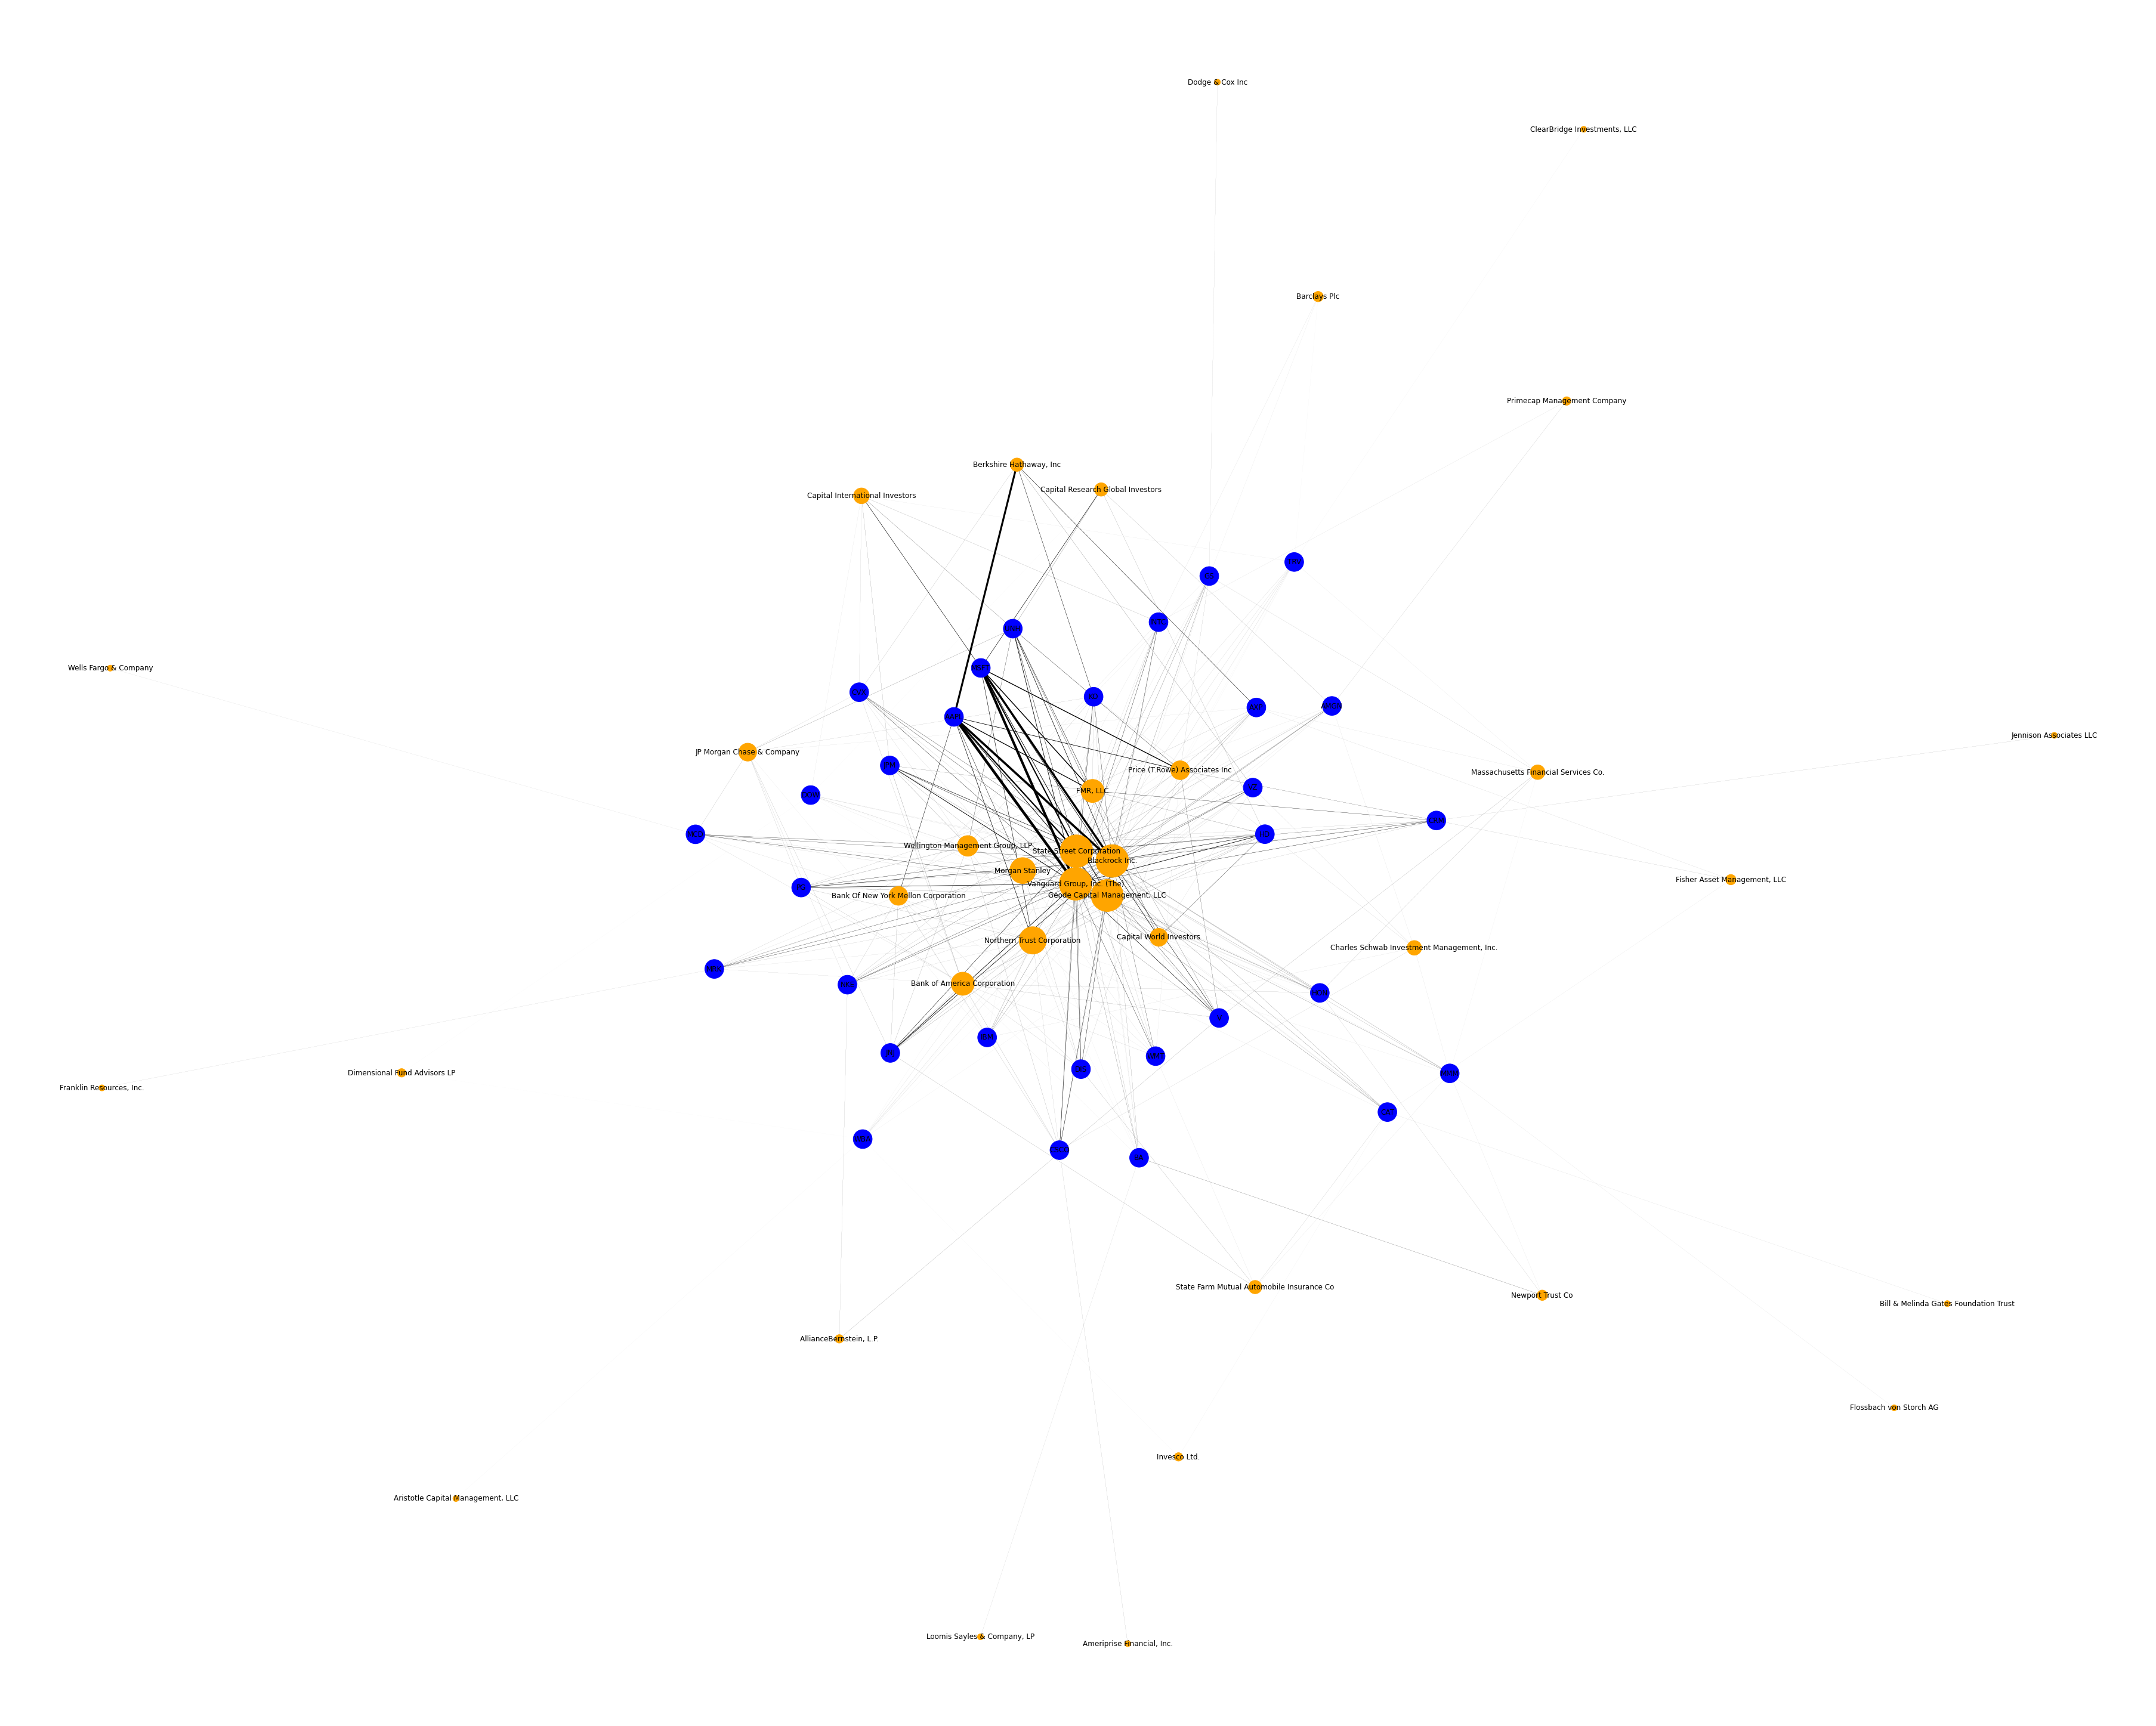

In [34]:
plt.figure(figsize=(50,40))
nx.draw(G, with_labels=True,
        node_color = colors,
        node_size = [v * 100 for v in dict(G.degree()).values()],
        width = [v[2]['Value']/50_000_000_000 for v in edgelist])